# Used Car Price Prediction Project

## Importing important Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PowerTransformer 
from scipy.stats import zscore
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#  Title         : Car Title
#  History       : Car History (Accidental or not)
#  Kilometer     : Car Driven km
#  Location      : Car registered location
#  Year          : Car purchased year
#  Onwer         : Car owner (1st or 2nd etc)
#  fuel          : Car fuel type
#  transmission  : Car tranmission (Automatic or Mannual)
#  prize         : Car (car prize)

## Importing DataSet

In [200]:
df = pd.read_csv("C:/Users/Admin/Desktop/Python Jupyter/Flip robo/Car Prize prediction/used_car_scarpped_data.csv")
df.shape

(6254, 9)

In [201]:
df.head()

,Title,History,Kilometer,Location,Year,Onwer,fuel,transmission,prize
0,2017 Tata TIGOR Revotron XT MANUAL,Non-Accidental,"70,895 km",DL,May-17,1st Owner,Petrol,MANUAL,"₹4,56,399"
1,2013 Ford Figo 1.4 ZXI DURATORQ MANUAL,Non-Accidental,"75,454 km",DL,Oct-13,1st Owner,Diesel,MANUAL,"₹2,01,799"
2,2012 Maruti Swift VDI MANUAL,Non-Accidental,"1,20,326 km",DL,Nov-12,2nd Owner,Diesel,MANUAL,"₹3,06,599"
3,2012 Volvo S60 SUMMUM D5 AUTOMATIC,Non-Accidental,"41,361 km",DL,Dec-12,2nd Owner,Diesel,AUTOMATIC,"₹9,40,799"
4,2012 Maruti Swift Dzire VDI BS IV MANUAL,Non-Accidental,"77,730 km",DL,Nov-12,1st Owner,Diesel,MANUAL,"₹3,62,399"


In [ ]:
# As we can see, this is raw data, I have applied lots of pre processing techniques for making best data 
# for model building

### Information about dataset

In [202]:
df.dtypes

Title           object
History         object
Kilometer       object
Location        object
Year            object
Onwer           object
fuel            object
transmission    object
prize           object
dtype: object

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6254 entries, 0 to 6253
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         6254 non-null   object
 1   History       6254 non-null   object
 2   Kilometer     6254 non-null   object
 3   Location      6254 non-null   object
 4   Year          6254 non-null   object
 5   Onwer         6254 non-null   object
 6   fuel          6254 non-null   object
 7   transmission  6015 non-null   object
 8   prize         6254 non-null   object
dtypes: object(9)
memory usage: 439.9+ KB


In [ ]:
# When I had scrapped data from website that time these columns type was of object type 
# Here, transmission column is having null value, but that is filled by “-”, therefore, “-” is replaced 
# with null value, then applied null value operation accordingly

# Initially, Every column is of object type.

### Removing Duplicates

In [205]:
df.drop_duplicates(inplace = True)
df.shape

(4152, 9)

### Removing null values of dataset

In [207]:
df.replace('-', '', inplace = True)
df.isnull().sum()

Title             0
History           0
Kilometer         0
Location          0
Year              0
Onwer             0
fuel              0
transmission    152
prize             0
dtype: int64

<AxesSubplot:>

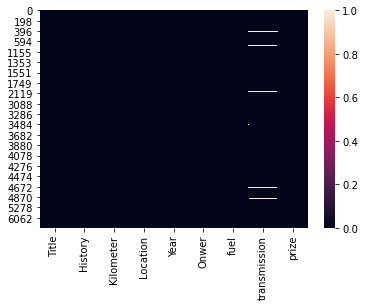

In [208]:
sns.heatmap(df.isnull() )

In [209]:
# if delete this transmission missing values then we do not loss data more than 5 % 
# Only approx 3 % data loss we will get if we delete these null values

In [210]:
df.dropna(inplace = True)
df.isnull().sum()

Title           0
History         0
Kilometer       0
Location        0
Year            0
Onwer           0
fuel            0
transmission    0
prize           0
dtype: int64

<AxesSubplot:>

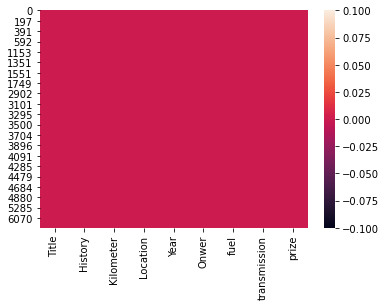

In [211]:
sns.heatmap(df.isnull()  )

In [212]:
# As heatmap is clean, means not outliers are present in the dataset

# As dropping operation of null value was giving very less data loss (less than 5%), therefore, I have drop
# null value.

### Data Preprocessing

In [213]:
df['Purchased Month'] = df['Year'].apply(lambda x:x.split("-")[0])

In [214]:
df['Purchased Year'] = df['Year'].apply(lambda x:x.split("-")[1])

In [215]:
df['Purchased Month'].unique()

array(['May', 'Oct', 'Nov', 'Dec', 'Sep', 'Jun', 'Apr', 'Aug', 'Feb',
       'Jan', 'Mar', 'Jul'], dtype=object)

In [216]:
df['Purchased Year'].unique()

array(['17', '13', '12', '16', '10', '14', '15', '18', '19', '20', '21',
       '11', '09', '08'], dtype=object)

In [217]:
n = {'10': 2010, '11': 2011, '12':2012, '13':2013, '14': 2014, '15':2015, '16':2016, '17':2017, '18':2018, '19':2019,'20':2020,
     '21':2021, '08':2008, '09':2009 }     
df['Purchased Year']= df['Purchased Year'].replace(n)

In [218]:
df['Purchased Year'].unique()

array([2017, 2013, 2012, 2016, 2010, 2014, 2015, 2018, 2019, 2020, 2021,
       2011, 2009, 2008], dtype=int64)

In [219]:
pd.set_option('display.max_rows', None)  # to maximize display of the rows
pd.set_option('display.max_columns', None)  # to maximize display of the columns

In [220]:
df.head()  # top 5 rows

,Title,History,Kilometer,Location,Year,Onwer,fuel,transmission,prize,Purchased Month,Purchased Year
0,2017 Tata TIGOR Revotron XT MANUAL,Non-Accidental,"70,895 km",DL,May-17,1st Owner,Petrol,MANUAL,"₹4,56,399",May,2017
1,2013 Ford Figo 1.4 ZXI DURATORQ MANUAL,Non-Accidental,"75,454 km",DL,Oct-13,1st Owner,Diesel,MANUAL,"₹2,01,799",Oct,2013
2,2012 Maruti Swift VDI MANUAL,Non-Accidental,"1,20,326 km",DL,Nov-12,2nd Owner,Diesel,MANUAL,"₹3,06,599",Nov,2012
3,2012 Volvo S60 SUMMUM D5 AUTOMATIC,Non-Accidental,"41,361 km",DL,Dec-12,2nd Owner,Diesel,AUTOMATIC,"₹9,40,799",Dec,2012
4,2012 Maruti Swift Dzire VDI BS IV MANUAL,Non-Accidental,"77,730 km",DL,Nov-12,1st Owner,Diesel,MANUAL,"₹3,62,399",Nov,2012


In [221]:
df['Title'][0][5:]

'Tata TIGOR Revotron XT MANUAL'

In [222]:
df['Title'] = df['Title'].apply(lambda x:x[5:])
# df.head()

In [223]:
df['Purchased Year'] = df['Purchased Year'].astype('int')

In [224]:
df['prize'][0].replace(',', '')

'₹456399'

In [225]:
df['prize'] = df['prize'].apply(lambda x:x.replace(',', ''))

In [226]:
df['prize'] = df['prize'].apply(lambda x:x[1:])

In [227]:
# df['prize'] = df['prize'].apply(lambda x: x[0][1:])
df['prize'] = df['prize'].astype('int')

In [228]:
df['History'].unique() # All rows having non accidental status therefore this column can be deleted from the dataset

array(['Non-Accidental'], dtype=object)

In [229]:
df['Location'].unique() 

array(['DL', 'HR', 'UP', 'CH', 'PB', 'GJ', 'MH', 'KA', 'TS', 'AP', 'TN',
       'WB', 'OR', 'JH', 'KL', 'BR', 'RJ'], dtype=object)

In [230]:
df['Kilometer'] = df['Kilometer'].apply(lambda x:x[:-3])

In [231]:
df['Kilometer'] = df['Kilometer'].apply(lambda x:x.replace(',', ''))

In [232]:
df.drop(columns = ['Year', 'History'], inplace = True)

In [233]:
df['Title'] = df['Title'].apply(lambda x:x.replace('MANUAL',''))
df['Title'] = df['Title'].apply(lambda x:x.replace('AUTOMATIC',''))

In [234]:
df['Company'] = df['Title'].apply(lambda x:x.split(" ")[0])

In [235]:
df['Car Name'] = df['Title'].apply(lambda x:x.split(" ")[1])

In [236]:
df['Title'][0]

'Tata TIGOR Revotron XT '

In [237]:
df['Title'][0]

'Tata TIGOR Revotron XT '

In [238]:
len(df['Title'][0].split(" "))

5

In [240]:
df['Title'][0]

'Tata TIGOR Revotron XT '

In [241]:
title_value = df['Title'].values

In [242]:
models_lst = []
for i in title_value:
    var = i.split(' ')
    models_lst.append(i.replace(var[0], '').replace(var[1], '')[2:])
    
len(models_lst)
df['Model'] = models_lst

In [243]:
df['Model'] = df['Model'].apply(lambda x:x.replace('DIESEL', ''))
df['Model'] = df['Model'].apply(lambda x:x.replace('PETROL', ''))

In [244]:
df.drop(columns = ['Title'], inplace = True)

In [245]:
df['Prize']=df['prize']

In [246]:
df.drop(columns = ['prize'], inplace = True)

In [247]:
df['Car Name'].unique()

array(['TIGOR', 'Figo', 'Swift', 'S60', 'Innova', 'New', 'Ertiga', 'S',
       'Ritz', 'Wagon', 'Dzire', 'Etios', 'Q3', 'Ciaz', 'Ecosport',
       'Fortuner', 'Amaze', 'Duster', 'Tiago', 'Vitara', 'Kwid', 'Baleno',
       'X1', 'Alto', '3', 'City', 'Verna', 'Tucson', 'SELTOS', 'Elite',
       'VENUE', 'Creta', 'IGNIS', 'WR-V', 'NEW', 'YARIS', 'Glanza',
       'Corolla', 'i20', 'Benz', 'Vento', 'i10', 'XUV500', '5', 'Grand',
       'Brio', 'Eon', 'Polo', 'Celerio', 'Jazz', 'GRAND', 'A', 'Ameo',
       'Redi', 'Xcent', 'Compass', 'Eeco', 'Superb', 'Civic', 'HECTOR',
       'Bolero', 'Thar', 'NEXON', 'Micra', 'Zen', 'TUV300', 'Rapid',
       'CRV', 'Hexa', 'Go', 'BR-V', 'Octavia', 'Terrano', 'ALTROZ',
       'Nano', 'Scorpio', 'Freelander', 'XF', 'Camry', 'Kuv100',
       'FREESTYLE', 'OMNI', 'Harrier', 'TRIBER', 'Jetta', 'XL6', 'Santa',
       'A3', 'Santro', 'Mobilio', 'Captur', 'MARAZZO', 'AURA', 'Sunny',
       'Rexton', 'A4', 'Endeavour', 'Beat'], dtype=object)

In [248]:
df['Kilometer']= df['Kilometer'].astype('float')
df['Prize']= df['Prize'].astype('float')

In [249]:
df.dtypes

Kilometer          float64
Location            object
Onwer               object
fuel                object
transmission        object
Purchased Month     object
Purchased Year       int32
Company             object
Car Name            object
Model               object
Prize              float64
dtype: object

In [ ]:
# These few slides are of data preprocessing steps, which I have applied on dataset.

## Visualization

#### For Object Type columns

In [250]:
object_col = df.select_dtypes(include = ['object', 'int32']).keys()
object_col

Index(['Location', 'Onwer', 'fuel', 'transmission', 'Purchased Month',
       'Purchased Year', 'Company', 'Car Name', 'Model'],
      dtype='object')

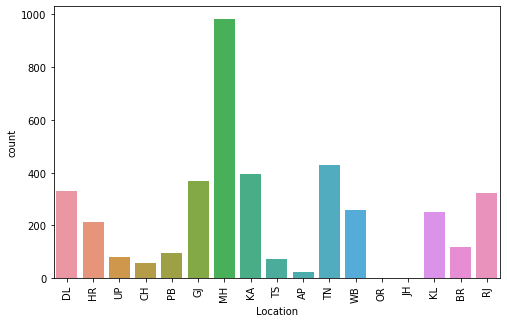

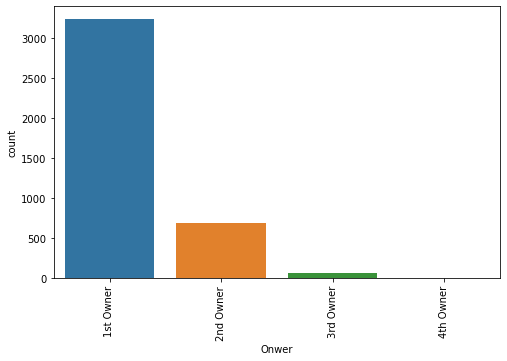

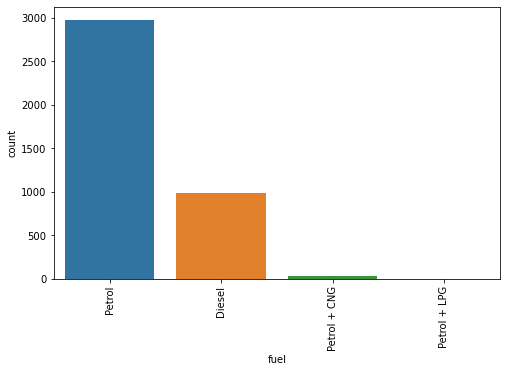

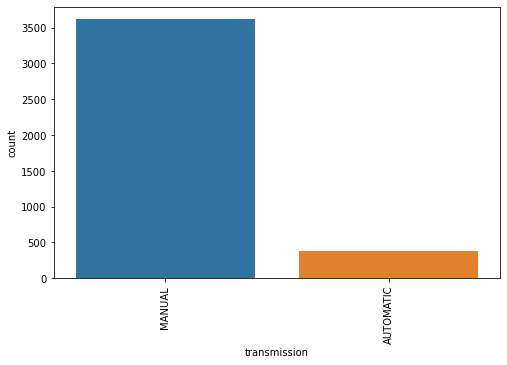

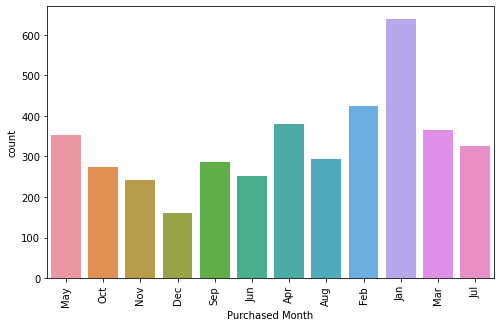

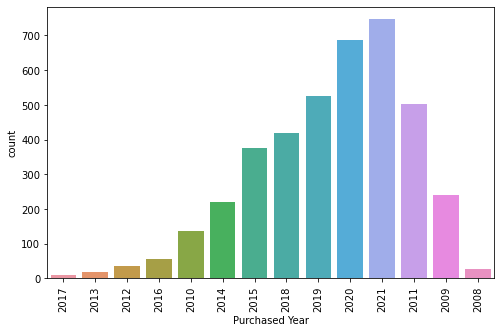

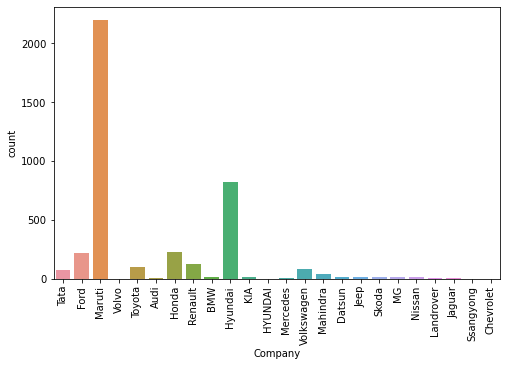

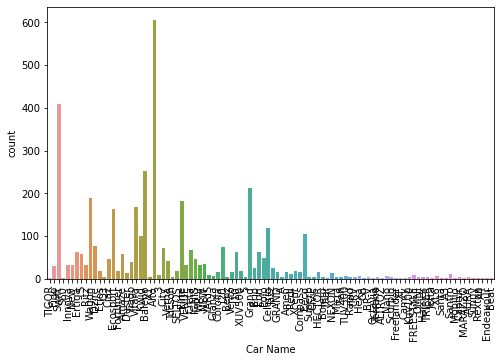

In [251]:
for i in object_col[:-1]:
    l = list(df[i].unique())
    plt.figure(figsize = (8, 5))
    countplot = sns.countplot(df[i])
    countplot.set_xticklabels(labels = l, rotation = 90)

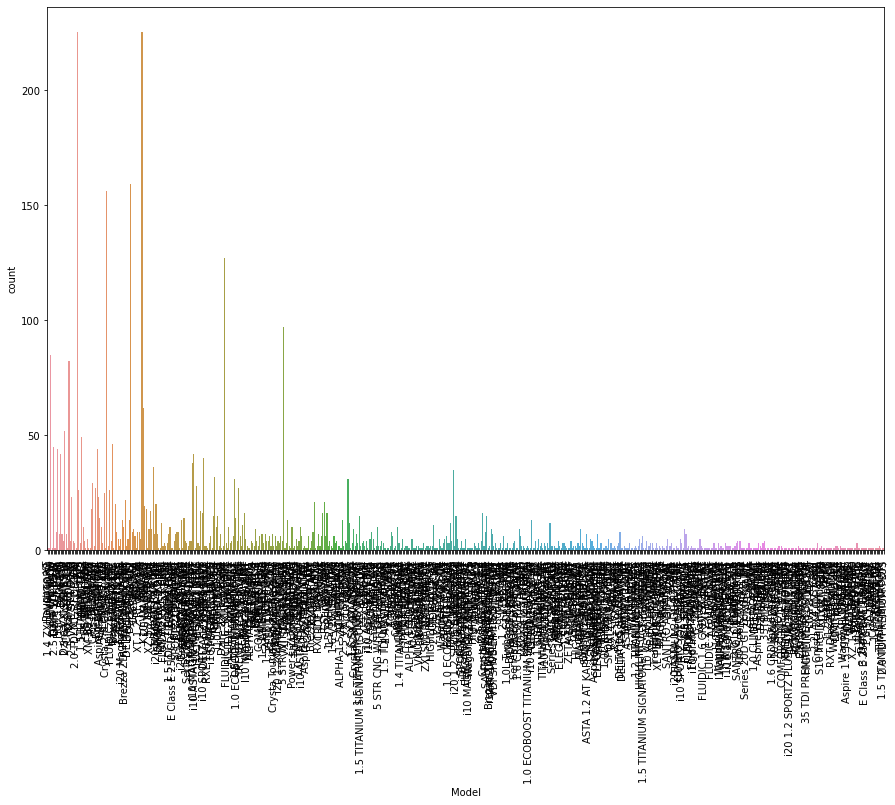

In [252]:
l = list(df['Model'].unique())
plt.figure(figsize = (15, 10))
countplot = sns.countplot(df['Model'])
countplot.set_xticklabels(labels = l, rotation = 90)
plt.show()

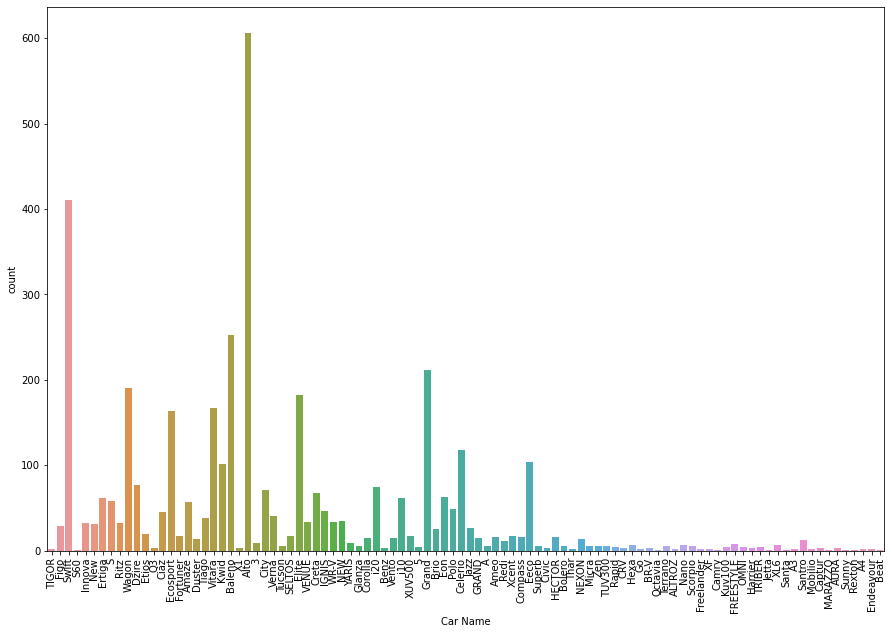

In [285]:
l = list(df['Car Name'].unique())
plt.figure(figsize = (15, 10))
countplot = sns.countplot(df['Car Name'])
countplot.set_xticklabels(labels = l, rotation = 90)
plt.show()

In [ ]:
# Majority vehicle is from ‘MH’ region, and least is from ‘JH’
# Maximum used car is of 1st owner  and very few car having 4th owner.
# Majority vehicle is of Petrol variant and very less vehicle is having Petrol + LPG
# Maximum car is manual transmission type.
# As maximum vehicle registration month is jan, it may be because of new year month. Accordingly one can 
# apply some special offer in this month for increase sell of vehicle
# Top 3 company cars in market, Maruti, Hyundai, Ford


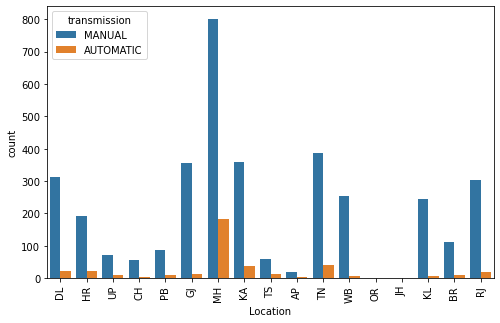

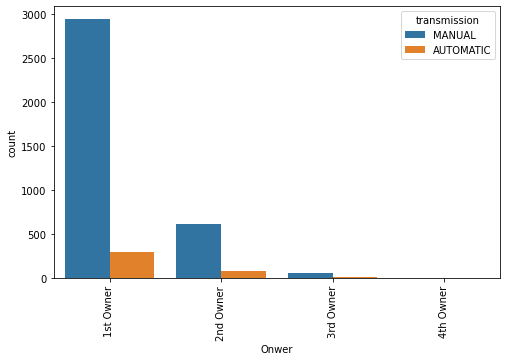

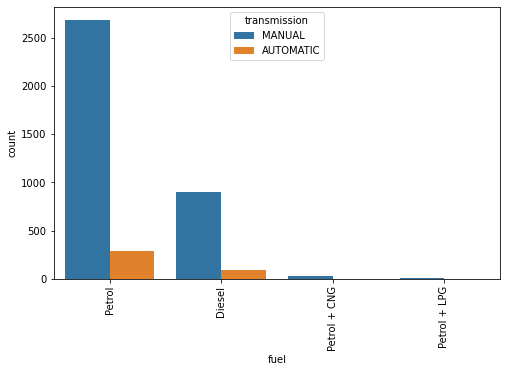

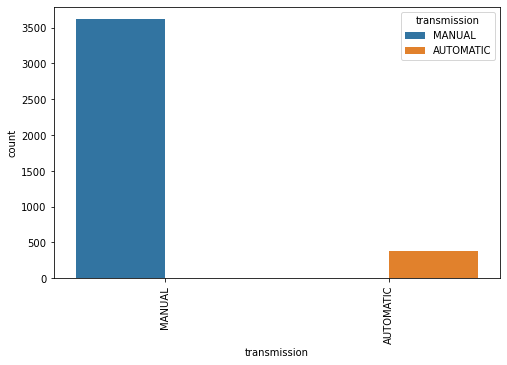

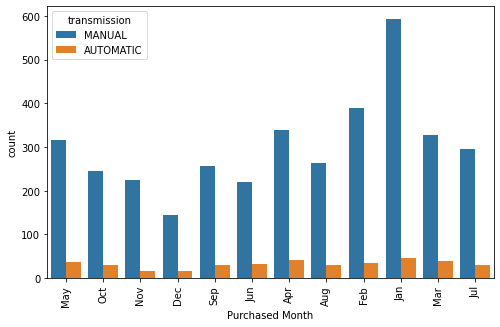

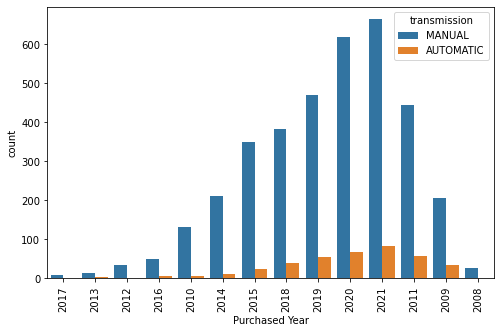

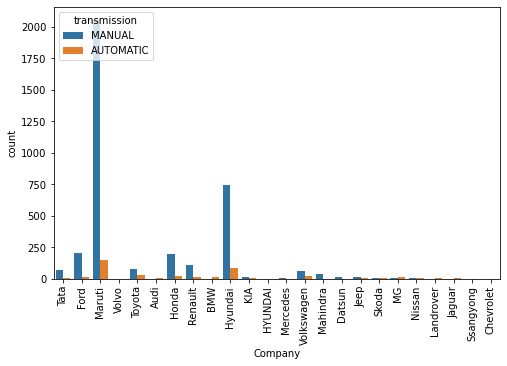

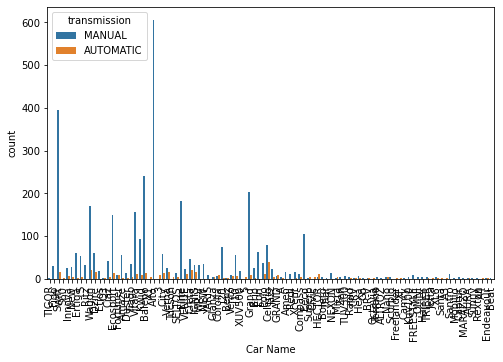

In [253]:
# plt.figure(figsize = (20, 8))
# countplot = sns.countplot(train_df['Source'], hue = train_df['Owner'])

for i in object_col[:-1]:
    l = list(df[i].unique())
    plt.figure(figsize = (8, 5))
    countplot = sns.countplot(df[i],hue = df['transmission'] )
    countplot.set_xticklabels(labels = l, rotation = 90)

In [254]:
# Pie Chart

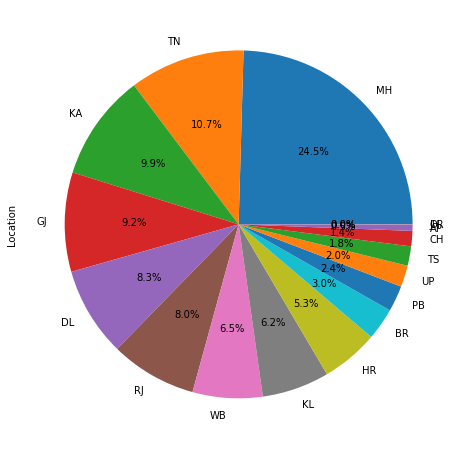

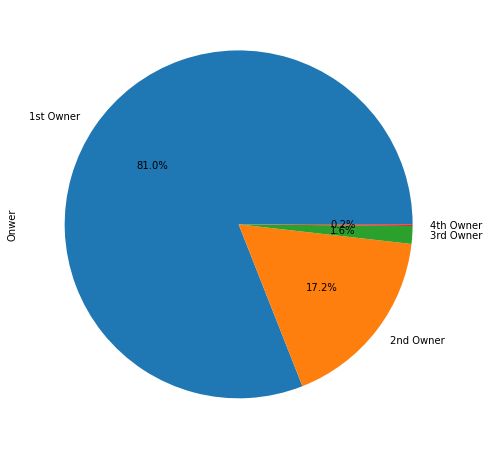

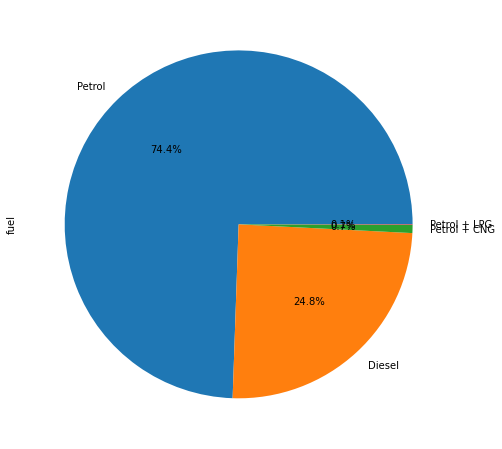

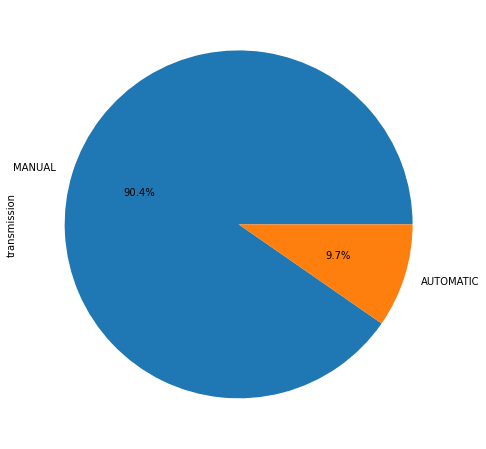

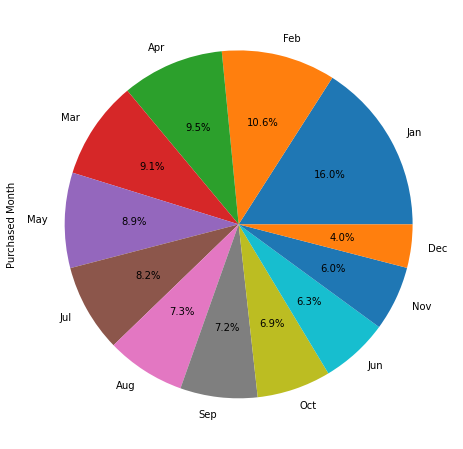

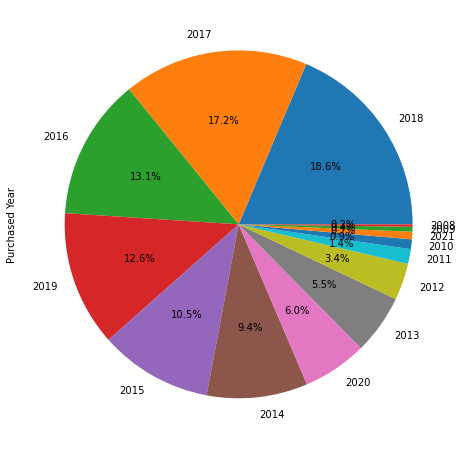

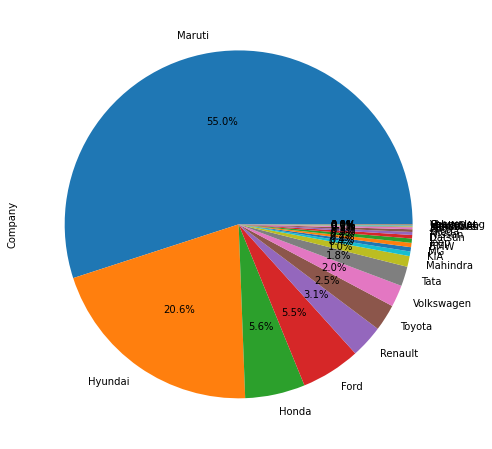

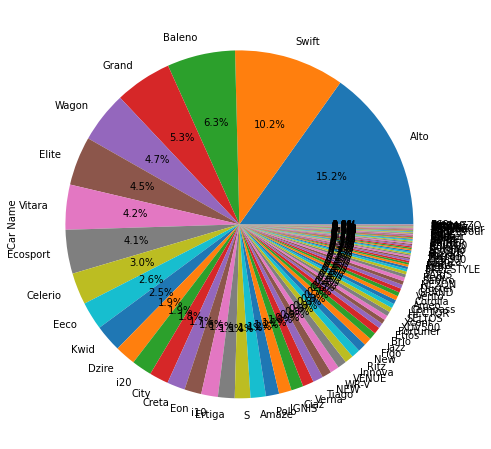

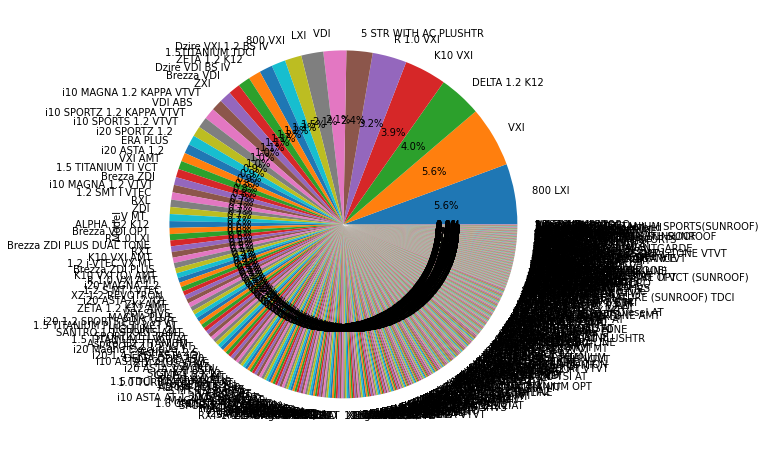

In [255]:
for i in object_col:
    
    plt.figure(figsize = (10, 8))
    df[i].value_counts().plot(kind = 'pie', autopct = '%.1f%%')

#### For integer type columns

In [256]:
# Kilometer
int_col = ['Kilometer', 'Prize']

### Checking outliers:

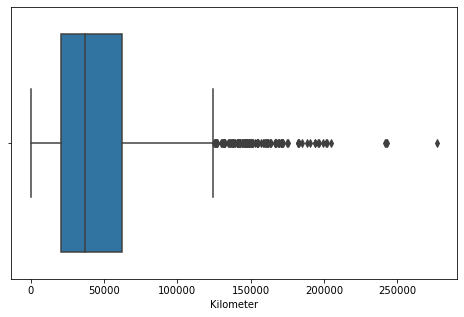

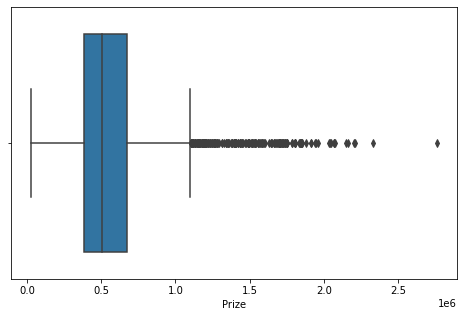

In [257]:
for i in int_col:
    plt.figure(figsize =  (8,5))
    sns.boxplot(df[i])

### Check Skewness

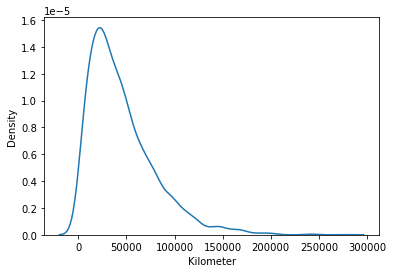

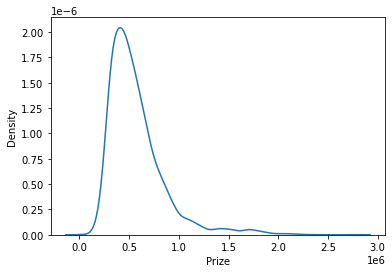

In [258]:
for i in int_col:
    plt.figure()
    sns.distplot(df[i], hist = False)

### Distribution of columns

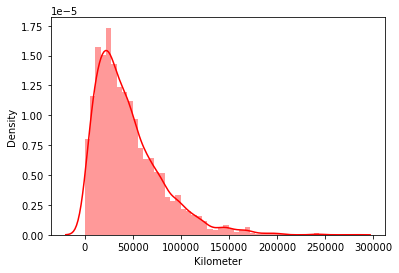

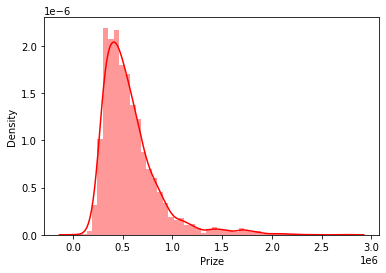

In [259]:
for i in int_col:
    plt.figure()
    sns.distplot(df[i], kde = True, color = 'r')

In [260]:
# ----

### Spread of float type columns

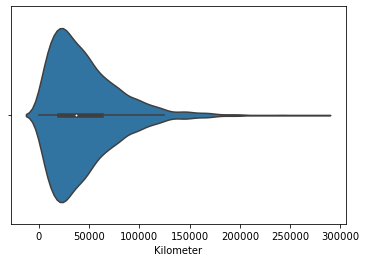

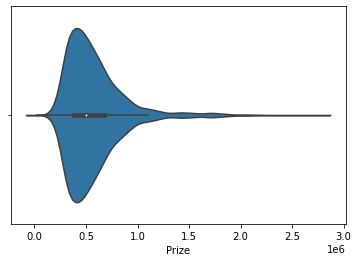

In [261]:
for i in int_col:
    plt.figure()
    sns.violinplot(df[i], orient = 'vertical')

In [262]:
# ---

In [263]:
df.columns

Index(['Kilometer', 'Location', 'Onwer', 'fuel', 'transmission',
       'Purchased Month', 'Purchased Year', 'Company', 'Car Name', 'Model',
       'Prize'],
      dtype='object')

#### Pattern of Float type columns with each other

<AxesSubplot:xlabel='Location', ylabel='Prize'>

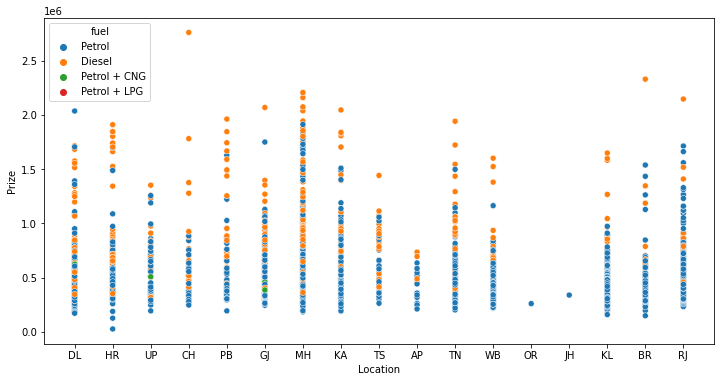

In [264]:
plt.figure(figsize = (12, 6))
sns.scatterplot(df['Location'], df['Prize'], hue = df['fuel'])

In [ ]:
# We can see, highest prize is of diesel cars and cars which are having petrol+CNG & LPG are having less
# low prize

<AxesSubplot:xlabel='Kilometer', ylabel='Prize'>

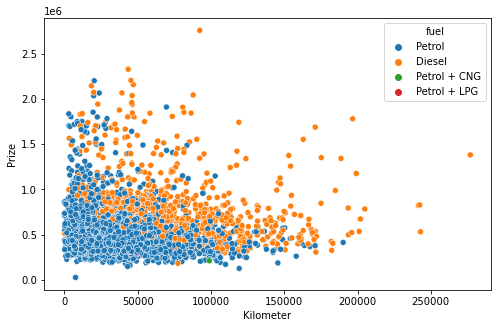

In [265]:
plt.figure(figsize = (8, 5))
sns.scatterplot(df['Kilometer'], df['Prize'], hue = df['fuel'])

In [ ]:
# Automatic and Diesel Variant cars are having higher rate as compare to other variants car.

<AxesSubplot:xlabel='Kilometer', ylabel='Prize'>

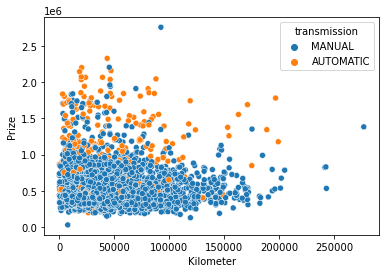

In [266]:
sns.scatterplot(df['Kilometer'], df['Prize'], hue = df['transmission'])

<AxesSubplot:xlabel='Purchased Year', ylabel='Prize'>

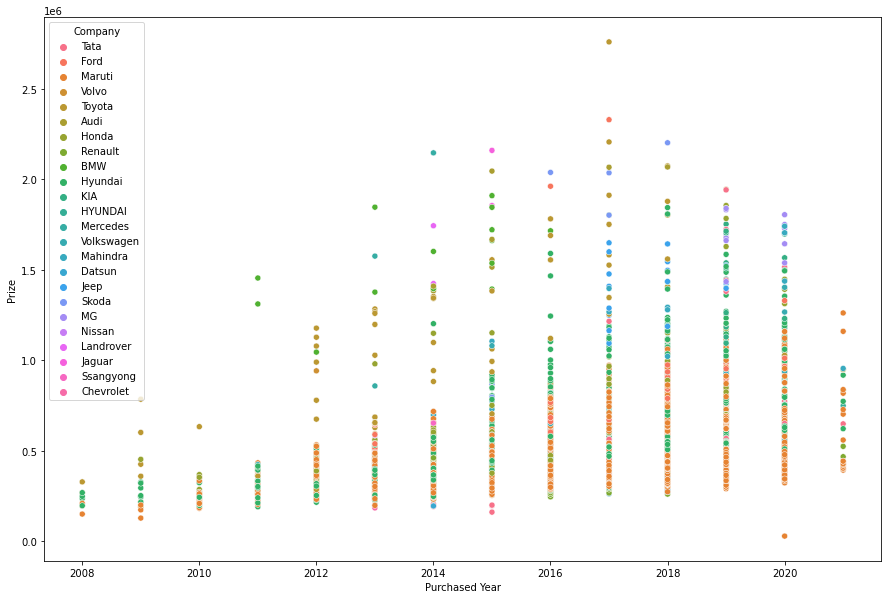

In [267]:
plt.figure(figsize = (15, 10))
sns.scatterplot(df['Purchased Year'], df['Prize'], hue = df['Company'])

In [ ]:
# Volvo car is having highest value, and maximum car is of Hundai, Maruti and etc.

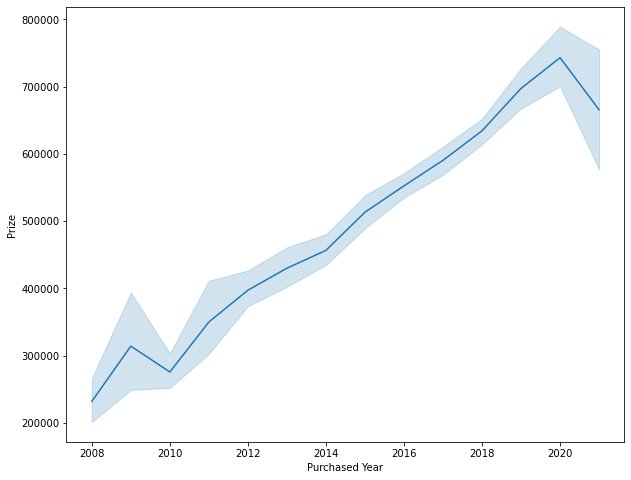

In [268]:
plt.figure(figsize = (10, 8))
sns.lineplot(x = 'Purchased Year', y = 'Prize', data = df)
plt.show()

In [269]:
# Prizes are going up with increase in model year, which is very obvious as newer the model prize will 
#  increase accordingly.


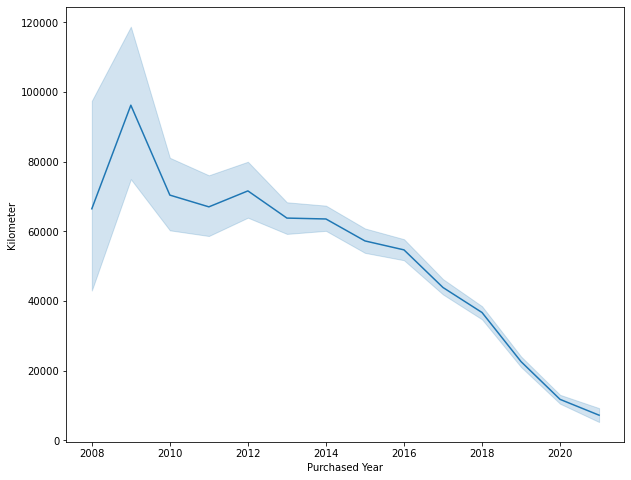

In [270]:
plt.figure(figsize = (10, 8))
sns.lineplot(x = 'Purchased Year', y = 'Kilometer', data = df)
plt.show()

In [ ]:
# As much newer model car one will choose, that much less driven car would be available.

### Correlation of the columns

In [271]:
df.corr()

,Kilometer,Purchased Year,Prize
Kilometer,1.000000,-0.463089,-0.026398
Purchased Year,-0.463089,1.000000,0.352076
Prize,-0.026398,0.352076,1.000000


<AxesSubplot:>

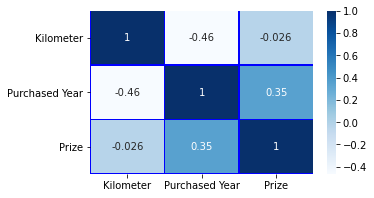

In [272]:
plt.figure(figsize = (5, 3))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues', linewidth = 0.5, linecolor = 'blue' )   # Heatmap with number, 

In [273]:
# Numeric columns are not much correlated with each other, as they are showing less value of correlation 
# As these column are not showing much correlation, it would be helpful to build a good model of machine
# learning


### Describe Data

In [274]:
df.describe()

,Kilometer,Purchased Year,Prize
count,4000.000000,4000.000000,4.000000e+03
mean,45246.656250,2016.428750,5.724124e+05
std,34386.590893,2.357077,2.875023e+05
min,58.000000,2008.000000,2.669900e+04
25%,20342.000000,2015.000000,3.824490e+05
50%,37023.000000,2017.000000,5.041490e+05
75%,62112.500000,2018.000000,6.703240e+05
max,276914.000000,2021.000000,2.760299e+06


<AxesSubplot:>

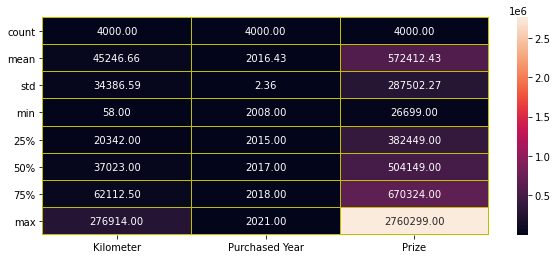

In [275]:
plt.figure(figsize = (10, 4))
sns.heatmap(df.describe(), annot = True, linewidth = 0.05, linecolor = 'y', fmt = "0.2f")

In [276]:
# Kilometer and Prize columns min and max value are having high difference, we can say these column are 
# highly spread

# Mean and 50 percentile value is having some value difference, mean these columns are having skewness
# Count for each column is same mean no null value present
# 25% and 75% is having difference , which also indicating , column spreadness 

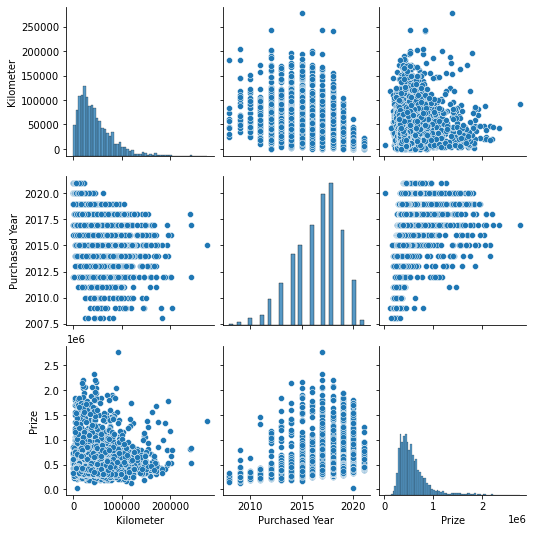

In [277]:
sns.pairplot(df)

In [279]:
df['Company'].nunique()

24

##### Ordinal Encoding 
 Encoder to the features

In [278]:
# for loop to give value counts for each objec type columns
for i in object_col:
    print('---------------------- ', i, ' ---------------------')
    print(df[i].value_counts())

----------------------  Location  ---------------------
MH    982
TN    429
KA    396
GJ    369
DL    332
RJ    321
WB    260
KL    250
HR    213
BR    119
PB     96
UP     80
TS     72
CH     57
AP     22
OR      1
JH      1
Name: Location, dtype: int64
----------------------  Onwer  ---------------------
1st Owner    3239
2nd Owner     689
3rd Owner      66
4th Owner       6
Name: Onwer, dtype: int64
----------------------  fuel  ---------------------
Petrol          2978
Diesel           990
Petrol + CNG      30
Petrol + LPG       2
Name: fuel, dtype: int64
----------------------  transmission  ---------------------
MANUAL       3614
AUTOMATIC     386
Name: transmission, dtype: int64
----------------------  Purchased Month  ---------------------
Jan    638
Feb    424
Apr    380
Mar    366
May    354
Jul    327
Aug    294
Sep    287
Oct    275
Jun    253
Nov    241
Dec    161
Name: Purchased Month, dtype: int64
----------------------  Purchased Year  ---------------------
2018    746

In [284]:
for i in object_col:
    print( i, ':', df[i].nunique())

Location : 17
Onwer : 4
fuel : 4
transmission : 2
Purchased Month : 12
Purchased Year : 14
Company : 24
Car Name : 98
Model : 597


In [85]:
object_col  # Object type columns

Index(['Location', 'Onwer', 'fuel', 'transmission', 'Purchased Year',
       'Purchased Month', 'Company', 'Car Name', 'Model'],
      dtype='object')

In [86]:
# Copy of train_df and test_df
encoded_df = df.copy()  

In [87]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()   # created instance of Ordinal Encoder

In [88]:
oe.fit(encoded_df[object_col])    
encoded_df[object_col] = oe.transform(encoded_df[object_col])  # Transforming  df 

In [89]:
print(encoded_df.shape)

(4000, 11)


In [ ]:
# Ordinal Encoding is used for feature columns, therefore, here I have applied ordinal encoding to the
# feature column of the dataset


#### Impect of features on Target Variable (Price)

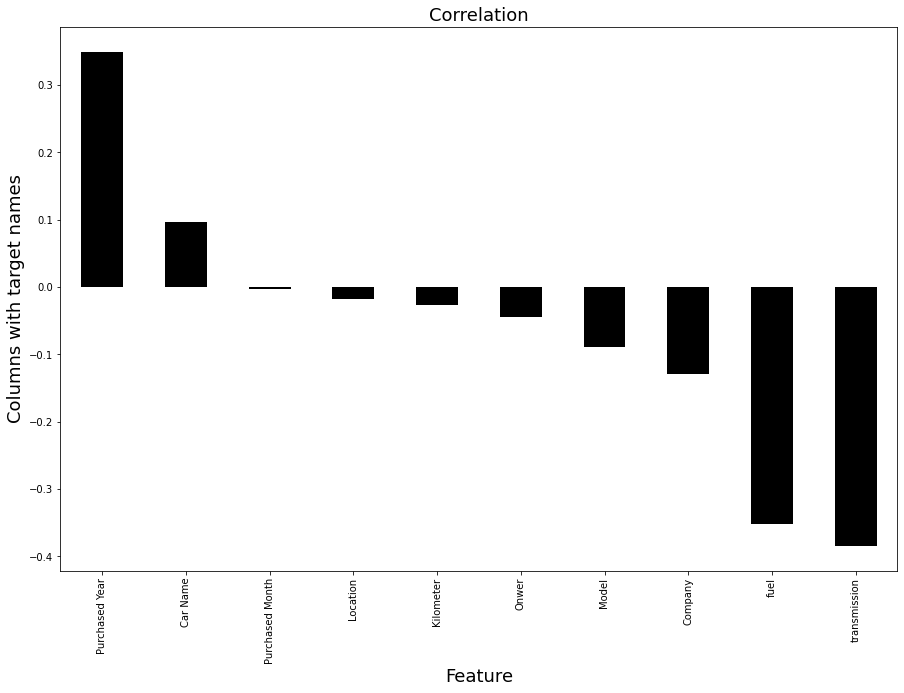

In [90]:
plt.figure(figsize = (15, 10))
encoded_df.corr()['Prize'].sort_values(ascending = False).drop(['Prize']).plot(kind = 'bar', color = 'black')
plt.xlabel( 'Feature', fontsize = 18)
plt.ylabel( 'Columns with target names', fontsize = 18)
plt.title ('Correlation', fontsize = 18)
plt.show()

In [91]:
# Purchase year positively impacting prizes whereas, transmission is negatively impacting (Manual varient
# is of less prize as compare to Automatic one) 


### Outlier Removing Techniques

#### 1. Try zscore technique

In [92]:
from scipy.stats import zscore

In [93]:
z = np.abs(zscore(encoded_df) )
df_z = encoded_df[(z < 3).all(axis = 1)] 
df_z.shape

# (3392, 11)

(3392, 11)

In [94]:
(encoded_df.shape[0] - df_z.shape[0] ) / encoded_df.shape[0]*100
#  15.2
# Heavy data loss we getting by this method

15.2

#### 2. IQR Technique

In [95]:
Q1 = encoded_df.quantile(0.25)
Q3 = encoded_df.quantile(0.75)
IQR = Q3 - Q1 

In [96]:
df_IQR = encoded_df[~((encoded_df < (Q1 - 1.5*IQR) ) | (encoded_df > (Q3 + 1.5*IQR) )).any(axis = 1) ] 
df_IQR.shape 
# (2111, 11)

(2111, 11)

In [97]:
(encoded_df.shape[0] - df_IQR.shape[0] ) / encoded_df.shape[0]  * 100
# 47.225 (Heavy dataset)

47.225

In [ ]:
# Both outliers removing techniques is giving high loss of data, therefore, I have word on dataset without 
# removing outliers


### Seperating dataset into x1 and y1 form

In [98]:
x = encoded_df.drop(columns= ['Prize'])
y = encoded_df['Prize']
print('shape of x', x.shape)
print('shape of y', y.shape)

shape of x (4000, 10)
shape of y (4000,)


In [ ]:
# After separating, the dataset into x and y form, we are having 10 feature columns and 1 target column 
# (prize)


### Removing Skewness

In [99]:
x['Kilometer'].skew()

1.4615216623851044

In [100]:
# apply sqrt (1 + x) transfornation
x['Kilometer'] = np.sqrt(1 + x['Kilometer'])
x['Kilometer'].skew()

0.3807329793335966

In [ ]:
# Applied square root transformation technique for removing skewness of ‘Kilometer’ column  

### Vetting of MultiColinearity 

##### Using VIF Technique

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [102]:
# function to calculate VIF
def cal_vif(data):   
    vif = pd.DataFrame()
    vif['Columns Name'] = data.columns   # columns name
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]  # operation to calculate vif
    return (vif)

In [103]:
cal_vif(x)

,Columns Name,VIF
0,Kilometer,7.051615
1,Location,5.268099
2,Onwer,1.249373
3,fuel,4.262860
4,transmission,8.848963
5,Purchased Year,9.476249
6,Purchased Month,3.405281
7,Company,7.772986
8,Car Name,3.172878
9,Model,4.391370


In [ ]:
# We have to check for only Kilometer column, and for this column VIF value is in acceptable range. 
# Every column is showing VIF value under acceptable range,
# Hence, dataset is is not having Multicolinearity

###### Standard Scaling 

In [104]:
x.head()

,Kilometer,Location,Onwer,fuel,transmission,Purchased Year,Purchased Month,Company,Car Name,Model
0,266.263028,3.0,0.0,1.0,1.0,9.0,8.0,20.0,76.0,373.0
1,274.690735,3.0,0.0,0.0,1.0,5.0,10.0,4.0,36.0,42.0
2,346.881824,3.0,1.0,0.0,1.0,4.0,9.0,14.0,75.0,446.0
3,203.376498,3.0,1.0,0.0,0.0,4.0,2.0,23.0,68.0,409.0
4,278.802798,3.0,0.0,0.0,1.0,4.0,9.0,14.0,75.0,226.0


In [105]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()   # Instance of Standard Scaler

In [106]:
# Scalling Training dataset
x[x.columns] = ss.fit_transform(x[x.columns])
x.head()

,Kilometer,Location,Onwer,fuel,transmission,Purchased Year,Purchased Month,Company,Car Name,Model
0,0.874380,-1.375488,-0.460178,0.534582,0.326813,0.246443,0.827512,1.796298,1.087378,0.374252
1,0.981957,-1.375488,-0.460178,-1.702163,0.326813,-1.387661,1.432805,-1.768891,-0.247770,-1.576696
2,1.903459,-1.375488,1.733759,-1.702163,0.326813,-1.796188,1.130158,0.459352,1.053999,0.804522
3,0.071649,-1.375488,1.733759,-1.702163,-3.059852,-1.796188,-0.988368,2.464771,0.820348,0.586440
4,1.034447,-1.375488,-0.460178,-1.702163,0.326813,-1.796188,1.130158,0.459352,1.053999,-0.492181


In [107]:
print(y.shape)
print(x.shape)

(4000,)
(4000, 10)


In [ ]:
# Just one step before of machine learning, this scaling is applied to make sure,  equal weightage of each 
# column should be occur during machine learning.


## Machine learning

In [108]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
import xgboost
from xgboost import XGBRegressor
# These libraries used for building model of machine learning

In [124]:
def ML_Model (algorithms, x, y ):  
    
    for algo in algorithms :
        max_acc = 0
        random_s = 0

        for i in range(0, 50):
            x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
            model = algo
            model.fit(x_train, y_train)
            model_pred = model.predict(x_test)
            acc = r2_score(model_pred, y_test)
    
            if acc > max_acc:
                max_acc = acc
                random_s = i
        print('\n______________________________________________________________________________')
        print(algo ,' is giving best accurancy', max_acc, 'on random state of', random_s )

        
            # train the model
        
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = random_s)
        model = algo
        model.fit(x_train, y_train)
    
        # predict the training set
        pred = model.predict(x_test)
        m_pred = model.predict(x_train)
    
        training = r2_score( y_train, m_pred)
        testing = r2_score( y_test, pred)
        
        print('Training accuracy is : ', training)
        print('Testing accuracy is :', testing) 
    
        print('-------------------------------------------------------------------------------')
        print('Mean Squared Error: ', mean_squared_error(pred, y_test ) )
        print('Mean Absolute Error: ', mean_absolute_error(pred, y_test ) )
        print('--------------------------------------------------------------------------------')
        print('Cross value score')
    
        # perform cross-validation
        for i in range(2, 8):
            cv_score = cross_val_score(model, x, y, cv = i ).mean()
            print('cv score',  cv_score ,'at', i, 'cross fold')
        print('--------------------------------------------------------------------------------')
        
#         plt.figure(figsize = (8, 5))
#         plt.scatter(x = y_test, y = pred, color = 'r')
#         plt.plot(y_test, y_test, color = 'g')
#         plt.xlabel('Actual', fontsize= 18 )
#         plt.ylabel('Predicted', fontsize = 18)
#         plt.title(str(model), fontsize = 20)

In [125]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [126]:
lr = LinearRegression()
dtr = DecisionTreeRegressor()
svr = SVR()
knn = KNeighborsRegressor()

models = [lr, dtr, svr, knn]
ML_Model(models, x, y)


______________________________________________________________________________
LinearRegression()  is giving best accurancy 0 on random state of 0
Training accuracy is :  0.4350592287657771
Testing accuracy is : 0.4255793536491609
-------------------------------------------------------------------------------
Mean Squared Error:  48228697313.85908
Mean Absolute Error:  157029.39984513258
--------------------------------------------------------------------------------
Cross value score
cv score 0.33056575774727853 at 2 cross fold
cv score 0.36654274760044786 at 3 cross fold
cv score 0.37435634843619253 at 4 cross fold
cv score 0.37172094518538434 at 5 cross fold
cv score 0.3704259392173203 at 6 cross fold
cv score 0.3554010298258235 at 7 cross fold
--------------------------------------------------------------------------------

______________________________________________________________________________
DecisionTreeRegressor()  is giving best accurancy 0.8279276328263634 on random s

In [127]:
# LinearRegression: This model is not giving overfitted model but having very less accuracy
# DecisionTreeClassifier: This model is having almost same values of testing accuracy and CV at 7 cross fold
# but giving Overfitted model

# SVR is not suitable for this data
# KNeighborsRegress: This model is also giving over fitted model and having high difference between cv and accuracy

### Apply Bagging and Boosting Techniques 

In [128]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
abr = AdaBoostRegressor()

models = [rfr, gbr, abr]
ML_Model(models, x, y)


______________________________________________________________________________
RandomForestRegressor()  is giving best accurancy 0.8722563186789769 on random state of 5
Training accuracy is :  0.9763372544561276
Testing accuracy is : 0.8944821994695854
-------------------------------------------------------------------------------
Mean Squared Error:  8167540452.821001
Mean Absolute Error:  50545.04429166667
--------------------------------------------------------------------------------
Cross value score
cv score 0.7741528062498255 at 2 cross fold
cv score 0.8075872765636823 at 3 cross fold
cv score 0.8151560491811716 at 4 cross fold
cv score 0.8332866759121828 at 5 cross fold
cv score 0.8383370422251527 at 6 cross fold
cv score 0.8352435635298693 at 7 cross fold
--------------------------------------------------------------------------------

______________________________________________________________________________
GradientBoostingRegressor()  is giving best accurancy 0.8168518

In [132]:
import xgboost
from xgboost import XGBRegressor
xgr = XGBRegressor()
models = [xgr]
ML_Model(models, x, y)


______________________________________________________________________________
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)  is giving best accurancy 0.9072099952624526 on random state of 5
Training accuracy is :  0.9959833963659347
Testing accuracy is : 0.9151101491368179
-------------------------------------------------------------------------------
Mean Squared Error:  6570846695.758522
Mean Absolute Error:  

In [139]:
# 	                             Training Acc.	     Testing Acc.	    CV	            difference
# RandomForestRegressor        	 0.976337	         0.894482	       0.838337	        0.056145
# GradientBoostingRegressor 	 0.880059	         0.861533	       0.80045	        0.061083
# AdaBoostRegressor	             0.564617	         0.497818	       0.245055	        0.252763
# XGBRegressor	                 0.995983	         0.91511	       0.869388	        0.045722

# RandomForestRegressor is givng overfitted model
# GradientBosstingRegressor is giving good performance, having very close value of accuracy of train and test dataset
# Adaboost is giving very low accuracy and also having high difference between cv and accuracy value
# XGBRegrssor is also performing good but giving overfitted model, as its having high difference between accuracy of train and
# test dataset

# After observation: GradientBoostingRegressor is selected for apply ensemble technique
# because nor giving overfitted neither underfitted and also having cv value which is near to accuracy of model

### Ensemble Techniques

In [134]:
from sklearn.model_selection import GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 34)

In [135]:
parameter = {'alpha' : [0.9, 0.09, 0.1], 
             'learning_rate' : [0.1, 0.01],
             'max_depth' : [ 3, 4, 5],
             'min_samples_leaf' : [1, 2, 3], 
            'min_samples_split': [2,3,4], 
            'n_estimators': [100, 50, 10]} 

In [136]:
gcv = GridSearchCV(estimator = GradientBoostingRegressor(), param_grid = parameter, cv = 7)
gcv.fit(x_train, y_train)

GridSearchCV(cv=7, estimator=GradientBoostingRegressor(),
             param_grid={'alpha': [0.9, 0.09, 0.1],
                         'learning_rate': [0.1, 0.01], 'max_depth': [3, 4, 5],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 50, 10]})

In [137]:
gcv.best_params_

{'alpha': 0.9,
 'learning_rate': 0.1,
 'max_depth': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 4,
 'n_estimators': 100}

In [ ]:
# ‘parameter’ these are the parameters which have to be applied on given model and then have to choose best
# one.
# GridSearchCV will help in that


In [138]:
gbr = GradientBoostingRegressor(alpha = 0.9, learning_rate = 0.1, max_depth = 5, min_samples_leaf=3,min_samples_split=4 , 
                                n_estimators = 100)

models = [gbr]
ML_Model(models, x, y)


______________________________________________________________________________
GradientBoostingRegressor(max_depth=5, min_samples_leaf=3, min_samples_split=4)  is giving best accurancy 0.8982800377021298 on random state of 10
Training accuracy is :  0.9599412808872572
Testing accuracy is : 0.9083251353168631
-------------------------------------------------------------------------------
Mean Squared Error:  8239306946.623017
Mean Absolute Error:  52627.709933710146
--------------------------------------------------------------------------------
Cross value score
cv score 0.8180102342450999 at 2 cross fold
cv score 0.8350164421398629 at 3 cross fold
cv score 0.8417221212146166 at 4 cross fold
cv score 0.8542132539134897 at 5 cross fold
cv score 0.8541844069219681 at 6 cross fold
cv score 0.8575650467925049 at 7 cross fold
--------------------------------------------------------------------------------


## Final model (GradientBoostingRegressor)

In [142]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 10)

final_model = GradientBoostingRegressor(alpha = 0.9, learning_rate = 0.1, max_depth = 5, min_samples_leaf=3,min_samples_split=4 , n_estimators = 100)
final_model.fit(x_train, y_train)
final_pred = final_model.predict(x_test)
final_pred_train = final_model.predict(x_train)

train_accuracy = r2_score(y_train, final_pred_train )
test_accuracy = r2_score(y_test, final_pred )
print('Training accuracy: ', train_accuracy)
print('Testing accuracy: ', test_accuracy)
print('______________________________________________')
print('Mean squared error: ', mean_squared_error(y_test, final_pred ) )
print('Mean absolute error: ', mean_absolute_error(y_test, final_pred) )

# Training accuracy:  0.9599412808872573
# Testing accuracy:  0.9086278762724012
# ______________________________________________
# Mean squared error:  8212098009.182926
# Mean absolute error:  52578.25530144247

Training accuracy:  0.9599412808872573
Testing accuracy:  0.9086278762724012
______________________________________________
Mean squared error:  8212098009.182926
Mean absolute error:  52578.25530144247


### Graph for the Performance of model

Text(0.5, 1.0, 'GradientBoostingRegressor Machine Learning Model')

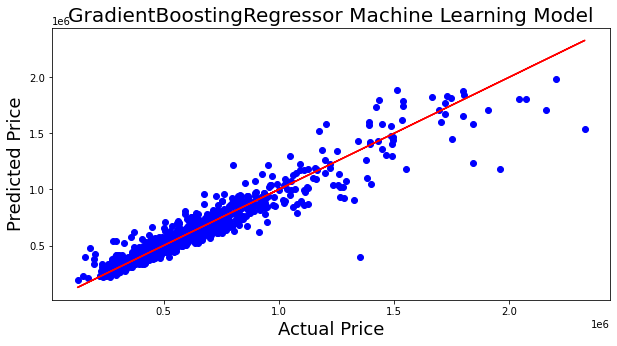

In [143]:
plt.figure(figsize = (10, 5))
plt.scatter(x = y_test, y = final_pred, color = 'b')
plt.plot(y_test, y_test, color = 'r')
plt.xlabel('Actual Price', fontsize= 18 )
plt.ylabel('Predicted Price', fontsize = 18)
plt.title('GradientBoostingRegressor Machine Learning Model', fontsize = 20)

### Deploy Model

In [144]:
import pickle
filename = 'car_price_predictor.pkl'
pickle.dump(final_model, open(filename, 'wb'))

### Loading model

In [145]:
load_model =  pickle.load(open('car_price_predictor.pkl', 'rb'))
result = load_model.score(x_test, y_test)
print(result)

0.9086278762724012


In [ ]:
# Deployed model by using pickle library of python
# After deploying the model same model imported and checked accuracy of that same model and found model is 
# giving 0.90 accuracy as previous. 
# Means deploy process is successfully executed 


### Conclusion

In [146]:
predicted = np.array(load_model.predict(x_test))
original = np.array(y_test)
# convert columns in to np.array 

In [153]:
round(predicted[0],2)
for i in predicted:
    

1130148.86

### Conclusion DataFrame

In [147]:
conclusion = pd.DataFrame({'Actual Price': original, 'Predicted Price': predicted},
                          index = range(len(original)))

In [154]:
conclusion['Predicted Price']= conclusion['Predicted Price'].apply(lambda x: round(x, 2))

In [ ]:
# One dataframe is created by the name “conclusion”, in this dataframe both (predicted and acutal ) values 
# will be imputed.
# By this dataframe one can see the difference between actual and predicted value 


In [166]:
conclusion.head(5)

,Actual Price,Predicted Price
0,1061399.0,1130148.86
1,361199.0,312087.91
2,521099.0,462287.78
3,379799.0,394309.07
4,1071499.0,1001997.98


In [159]:
conclusion.sample(10)

,Actual Price,Predicted Price
479,308199.0,304422.46
171,698799.0,685515.40
1032,843999.0,849936.76
472,434399.0,416783.03
22,611999.0,615455.59
1102,469599.0,450540.38
198,317099.0,350318.05
857,593099.0,589082.49
250,385599.0,406587.78
953,439099.0,517453.05


In [ ]:
# Comparing some value of actual dataset with predicted value by model